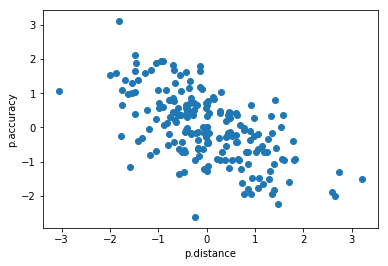

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

p = pd.read_csv("pga.csv")
p.distance = (p.distance-p.distance.mean())/p.distance.std()
p.accuracy = (p.accuracy-p.accuracy.mean())/p.accuracy.std()

plt.scatter(p.distance,p.accuracy)
plt.xlabel("p.distance")
plt.ylabel("p.accuracy")
plt.show()

theta1 is :  -0.508145896464


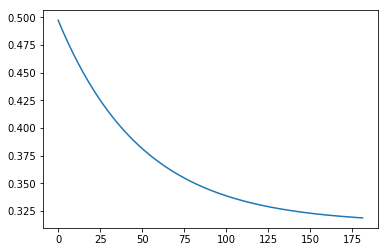

In [18]:
def cost(theta0,theta1,x,y):
    J=0
    m=len(x)
    for i in range(m):
        h=theta0+theta1*x[i]
        J+=(h-y[i])**2
    J/=(2*m)
    return J

def partial_derivative_theta0(theta0,theta1,x,y):
    J=0
    m = len(y)
    for i in range(m):
        h=theta0+theta1*x[i]
        J+=(h-y[i])
    J/=m
    return J

def partial_derivative_theta1(theta0,theta1,x,y):
    J=0
    m = len(y)
    for i in range(m):
        h=theta0+theta1*x[i]
        J+=(h-y[i])*x[i]
    J/=m
    return J

def gradient_descent(x,y,alpha=0.01,theta0=0,theta1=0):
    step_limitation = 1000
    step=0
    difference_limitation = 0.0001
    c = cost(theta0,theta1,x,y)
    cpre=c+10
    costs=[c]
    theta0s=[theta0]
    theta1s=[theta1]
    
    while (np.abs(cpre-c)>difference_limitation) and  (step<step_limitation):
        cpre=c
        dec_theta0=partial_derivative_theta0(theta0,theta1,x,y)
        dec_theta1=partial_derivative_theta1(theta0,theta1,x,y)
        theta0-=(alpha*dec_theta0)
        theta1-=(alpha*dec_theta1)
        
        c=cost(theta0,theta1,x,y)
        
        costs.append(c)
        theta0s.append(theta0)
        theta1s.append(theta1)
        
        step+=1
    return {'theta1':theta1,'theta0':theta0,'costs':costs}
print ("theta1 is : ",gradient_descent(p.distance,p.accuracy)['theta1'])
descend = gradient_descent(p.distance,p.accuracy)
plt.plot(range(len(descend['costs'])),descend['costs'])
plt.show()